In [17]:
import src.db.dataService as db
import src.db.preprocess as preprocess
import pandas as pd
import matplotlib.pyplot as plt

from get_location_features import get_location_features_by_squares, get_location_features_by_radius, get_elevation_data

connection = db.create_connection()
sensors_data = pd.read_csv(
    "data/air-quality-data-from-extensive-network-of-sensors/sensor_locations.csv").set_index(
    'id')
features_by_squares = [
    ('grid250_dochod', 'dochod_bud_pra'),
    ('grid250_demo_ext', 'populacja_razem'),
    ('grid250_demo_ext', 'budynki_all'),
    ('grid250_demo_ext', 'budynki_mieszkalne'),
]
squares = [9, 16, 25]

features_by_radius = {
    'Przystanek autobusowy': [1000, 2000],
    'Oddział Banku': [1000, 2000],
    'Przystanek tramwajowy': [1000, 2000],
    'Hipermarket': [1000, 2000],
    'Stacja Paliw': [1000, 3000]
}

In [18]:
sensors_data = get_location_features_by_squares(sensors_data, connection, features_by_squares, squares)
sensors_data = get_location_features_by_radius(sensors_data, connection, features_by_radius)
sensors_data = get_elevation_data(sensors_data)

In [19]:

print(sensors_data.head())

      latitude  longitude  dochod_bud_pra_9  dochod_bud_pra_16  \
id                                                               
3    50.057748  19.961375             47264              78228   
140  50.057747  19.961374             47264              78228   
142  50.084816  19.878066             47303              74255   
147  50.048924  19.962262             41575              77522   
169  50.048699  20.101569             23303              40365   

     dochod_bud_pra_25  populacja_razem_9  populacja_razem_16  \
id                                                              
3               113184               3743                6098   
140             113184               3743                6098   
142             121276               1303                1959   
147             116384                991                2965   
169              40365                 26                  59   

     populacja_razem_25  budynki_all_9  budynki_all_16    ...      \
id          

In [20]:
def get_target_variables(month):
    december_df = pd.read_csv("data/air-quality-data-from-extensive-network-of-sensors/"+month+"-2017.csv")
    ms = december_df.mean()
    means = pd.DataFrame({ms.index[i*6].split('_')[0]: list(ms[i*6:i*6+6]) for i in range(int(ms.shape[0]/6))}).T
    means.columns = ['temperature', 'humidity', 'pressure', 'pm1', 'pm10', 'pm25']
    means.index = means.index.astype('int64')
    return means[['pm1', 'pm10', 'pm25']]

In [21]:
y_dec = get_target_variables('december')
y_nov = get_target_variables('january')
print(y_dec)
print(y_nov)


           pm1       pm10       pm25
140  36.632582  39.072790  67.102253
142        NaN        NaN        NaN
147        NaN        NaN        NaN
169  24.949239  25.332487  40.593909
170  31.023173  34.793226  53.909091
171  32.537262  35.916811  56.802426
172  29.376238  34.039604  54.396040
173  29.112652  33.060659  52.376083
174  33.494208  32.455598  52.223938
176  30.270364  33.175043  58.237435
177  34.680212  39.130742  60.644876
178        NaN        NaN        NaN
179  30.726481  34.646341  54.898955
180  27.811092  29.889081  48.334489
181  32.048527  35.890815  56.495667
182  31.197574  34.516464  54.448873
183  30.442495  33.729045  53.758285
184  31.057192  32.582322  52.521664
185  35.203604  37.668468  59.263063
187        NaN        NaN        NaN
189  28.434095  31.557118  50.379613
192  32.960139  37.185442  58.261698
194  28.668403  32.071181  50.538194
195  31.165121  35.007421  55.669759
196  25.925087  29.421603  46.993031
201  32.552860  35.190641  55.729636
2

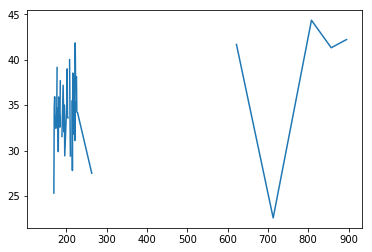

In [30]:
fig, ax = plt.subplots()
ax.plot(y_dec.index,y_dec['pm10'])
plt.show()

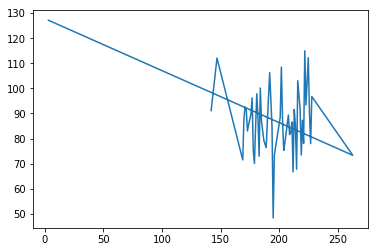

In [31]:
fig, ax = plt.subplots()
ax.plot(y_nov.index,y_nov['pm10'])
plt.show()

In [6]:
data = pd.concat([y, sensors_data], axis=1, join='inner')
data = data.dropna()

In [7]:
data.shape

(47, 28)

In [8]:
data.to_csv('./processed_data.csv')